https://www.kaggle.com/morrisb/what-does-your-smartphone-know-about-you

In [41]:
%matplotlib inline

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from mpl_toolkits import mplot3d

from sklearn.model_selection import train_test_split

from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
import scikitplot as skplt
import datetime

In [6]:
attribute_train = pd.read_csv('https://disk.bg/s/UFQtiaqlTDj2SZX/download')  ### train data load
attribute_test = pd.read_csv('https://disk.bg/s/VYmtGL4lzcHdcCl/download')

In [8]:
# separating data inputs and output lables 
train_data  = attribute_train.drop('Activity' , axis=1).values
label_data = attribute_train['Activity'].values

train_data_test = attribute_test.drop('Activity' , axis=1).values
label_data_test = attribute_test['Activity'].values


print('train data ' ,train_data.shape)
print('label data ' ,label_data.shape)

print('train data test ' ,train_data_test.shape)
print('label_data_test' ,label_data_test.shape)

train data  (7352, 562)
label data  (7352,)
train data test  (2947, 562)
label_data_test (2947,)


In [47]:
pca = PCA(n_components=3)
pca.fit(train_data)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [48]:
tranformed_data_train = pca.transform(train_data)

In [49]:
for i in tranformed_data_train:
    print(i)


[15.7272239  -7.24625881 -0.46558939]
[15.72331695 -7.26069038 -0.25900215]
[15.74256958 -7.20400561  0.10648338]
[15.71566582 -7.40380658  0.71993059]
[15.70315296 -7.4737066   0.98721956]
[15.70490002 -7.43616296  1.17514855]
[15.74070094 -7.13770603  0.39759892]
[15.72256335 -7.27521422 -0.13005625]
[15.73213971 -7.38406186  0.20400994]
[15.7655843  -6.88371116  0.33830372]
[15.76057222 -6.94893538  0.50722292]
[15.67494143 -7.74548953  1.7768905 ]
[15.67789482 -7.79814943  1.58133519]
[15.69321595 -7.7561652   2.11254449]
[15.8567314  -6.00707932 -2.78314351]
[15.70838994 -7.2636691  -0.82838346]
[15.69336657 -7.4520177  -0.23620599]
[15.7036304  -7.4423593   0.36030365]
[15.69612318 -7.58999851  1.48229493]
[15.6702017  -7.75823366  1.43298972]
[15.68708499 -7.81842418  2.50711411]
[15.68783483 -7.87570693  2.84285499]
[15.68827763 -7.7359127   2.30395439]
[15.68809802 -7.7478664   2.18057462]
[15.69666611 -7.66907109  1.89252878]
[15.70632685 -7.67567108  1.86966958]
[15.69075539

[10.82591462 -6.17818577  0.8293229 ]
[10.92099987 -5.19676567  0.05534782]
[11.13066654 -3.12631451 -2.64237414]
[10.94045601 -4.86632485 -1.69847764]
[10.8890747  -5.44864134 -0.62859556]
[10.81510631 -6.23078159  0.07768273]
[11.19490932 -2.52818859 -2.60609867]
[11.28175382 -1.99131868 -2.07796008]
[11.11794627 -3.64430858 -0.11681541]
[10.88172092 -5.53459484 -0.56103778]
[10.85727328 -5.95219528  0.44943585]
[10.8017818  -6.52403987  1.45535531]
[10.7813712  -6.75602959  1.87961078]
[10.7823405  -6.74555693  2.00328871]
[10.81971051 -6.40498999  1.14156563]
[10.81074306 -6.3927965   0.9475366 ]
[11.15464956 -3.01334609 -2.04105901]
[11.05334781 -4.10088037 -0.06304967]
[11.0054576  -4.66391638 -0.05567733]
[10.9721807  -4.92393976 -0.17309867]
[10.84356177 -6.21162172  0.93145191]
[10.82516147 -6.3032207   1.18278496]
[10.82290779 -6.30916292  1.18150875]
[10.79057274 -6.67834208  2.14122246]
[10.82620087 -6.3818553   1.53613554]
[10.86618849 -6.00903496  0.22944968]
[10.85709409

[ 6.75546059  3.37385204 -3.64955925]
[ 6.70109381  2.74028918 -3.43713118]
[ 6.67017161  2.47790919 -3.00897654]
[ 6.72418243  2.94593181 -2.61044611]
[ 6.83357077  3.85553153 -2.17880075]
[ 6.80240612  3.60601056 -2.90140669]
[ 6.76972648  3.3934407  -2.94986082]
[ 6.78387857  3.43633199 -2.57407052]
[ 6.69616875  2.72592192 -2.53226528]
[ 6.71547401  2.84505828 -2.90887425]
[ 6.70605653  2.75426681 -3.11675975]
[ 6.68531423  2.62892411 -3.58249433]
[ 6.66855125  2.45198504 -3.71916399]
[ 6.69436857  2.70916256 -3.33946529]
[ 6.74439111  3.18592624 -3.21024402]
[ 6.7248389   2.83073953 -2.79027032]
[ 6.67785787  2.3629227  -2.73152146]
[ 6.81862737  3.75787004 -2.83126016]
[ 6.76511775  3.13427109 -2.80435745]
[ 6.73930449  3.01475572 -3.07431177]
[ 6.77959772  3.36277427 -2.23611954]
[ 6.8023954   3.60060316 -2.12634209]
[ 6.71105869  2.89442322 -3.31581011]
[ 6.71244685  2.87627048 -3.44945184]
[ 6.74493287  3.08473653 -3.2188208 ]
[ 6.71813532  2.80561236 -3.15644125]
[ 5.80188236

[ 1.76763204  3.4957346  -2.77162185]
[ 1.73693615  3.23291303 -2.82493764]
[ 1.82713731  4.01566903 -2.0837401 ]
[ 1.82650141  4.00996246 -1.89711933]
[ 1.67290597  2.62421413 -2.56465301]
[ 1.68896952  2.72346978 -1.97259125]
[ 1.68936002  2.73354086 -2.2780064 ]
[ 1.62762379  2.26802686 -3.37927555]
[ 1.62877722  2.26328852 -2.8178455 ]
[ 1.7346445   3.17785635 -2.71072089]
[ 1.78260384  3.55555449 -2.47970046]
[ 1.77518879  3.41024354 -2.24470464]
[ 1.74535391  3.30843929 -2.45960482]
[ 1.74457324  3.23904599 -2.36882957]
[ 1.71901097  3.00888629 -2.66278569]
[ 1.70588649  2.91759922 -2.64914585]
[ 1.70754325  3.02167788 -2.5881749 ]
[ 1.66985596  2.59367292 -2.13490041]
[ 0.93191341 -4.65786959 -1.12673867]
[ 0.836333   -5.49075877 -0.0713251 ]
[ 0.80428191 -5.87185791  0.51821274]
[ 0.82974292 -5.53265905 -0.63831927]
[ 0.84026429 -5.53156967 -0.24560274]
[ 8.16192240e-01 -5.70355298e+00  1.90678704e-03]
[ 0.83869032 -5.52048526 -0.10687574]
[ 0.82611527 -5.73288697  1.01858051]


[-2.23464473 -5.76493445  0.81665463]
[-2.21340272 -5.58813114  0.4536315 ]
[-2.21001037 -5.58758582  0.50014282]
[-2.22777132 -5.76629869  0.95763491]
[-2.24081351 -5.83778422  0.85548724]
[-2.23701844 -5.81764087  0.72678765]
[-1.86710988 -2.27305963 -3.41971028]
[-2.10584309 -4.52935717 -2.54018108]
[-2.13840978 -4.89574746 -1.72945492]
[-2.15261404 -5.12358321 -1.09729679]
[-2.19173827 -5.53203309 -0.04885903]
[-2.16799982 -5.23965917 -0.54488245]
[-2.14320915 -5.11446769 -0.9138068 ]
[-1.98507185 -3.53810166 -1.62470497]
[-1.94987912 -3.18344185 -2.1899968 ]
[-2.02397898 -3.83034347 -2.02952978]
[-2.09213831 -4.54163348 -1.89073059]
[-2.10339439 -4.5355552  -1.51898907]
[-2.08126142 -4.35189094 -1.64613453]
[-2.12362041 -4.91816878 -0.26856303]
[-2.20079429 -5.64778223  0.57193628]
[-2.0361017  -4.12166653 -0.72335445]
[-2.03972303 -4.15095054 -0.47427732]
[-2.13602234 -4.972951    0.26368845]
[-2.0837296  -4.41043585 -0.8877894 ]
[-2.10188221 -4.5626215  -1.53252851]
[-2.02282432

[-4.95444855 -3.14207917 -3.32062839]
[-5.07122965 -4.15248386 -1.55698709]
[-5.12184166 -4.53904804 -0.83419497]
[-5.04994351 -3.87216088 -1.44583005]
[-4.9229101  -2.96747206 -0.74137784]
[-4.95315431 -3.31909352 -0.11231858]
[-5.08214105 -4.3227955  -0.72498097]
[-5.01419746 -3.62670323 -1.20644219]
[-5.04940277 -3.9432319  -0.57091595]
[-5.02079429 -3.5798271  -2.38480501]
[-5.02217113 -3.56546181 -2.29965843]
[-5.14643932 -4.80486058 -0.44841866]
[-5.1216986  -4.78540449  0.05448264]
[-5.06345543 -4.09659707 -1.59545738]
[-5.07918936 -4.29525216 -1.23331561]
[-4.99087098 -3.59830344 -1.06028671]
[-5.0789522  -4.49596669  0.71153306]
[-5.16439624 -4.99057459 -0.38656355]
[-5.16737916 -5.17180013  0.79531622]
[-5.17554057 -5.15962487 -0.05393499]
[-5.19092318 -5.24326947 -0.053412  ]
[-5.20663155 -5.55568064  1.23907758]
[-5.11400394 -4.61160319  0.27579886]
[-5.10149427 -4.52006949 -0.37667098]
[-5.20824491 -5.4282926  -0.08786762]
[-5.19970621 -5.48390403  1.26778893]
[-5.19564518

[-6.18543078 -5.09847648 -0.27370945]
[-6.04496306 -3.96188609  0.56626771]
[-4.89163001  6.66435627  0.6991758 ]
[-4.78681894  7.46673819  1.30004561]
[-4.76079076  7.61185221  1.42984286]
[-4.72544564  7.96394802  1.79063859]
[-4.68237742  8.34057621  1.83594971]
[-4.72104802  8.01696619  1.77030214]
[-4.60628516  8.93083399  3.02848405]
[-4.58167571  9.16606281  3.05512456]
[-4.68074515  8.3376762   1.92481887]
[-4.67954653  8.40303237  1.64265745]
[-4.69657213  8.21314608  2.15735134]
[-4.70507513  8.0557916   1.64329546]
[-4.57606398  9.23765487  2.74208627]
[-4.45102712 10.40408035  3.3354148 ]
[-4.39508162 10.96812356  3.64128072]
[-4.60605357  9.22208305  2.19191885]
[-4.47910993 10.17585729  3.45636697]
[-4.36134364 11.18211431  3.56839499]
[-4.47059248 10.19440226  3.36934274]
[-4.61978186  8.91260665  2.75228349]
[-4.56806458  9.49756578  2.73296234]
[-4.4971087  10.11383856  3.26796354]
[-4.6286818   8.89519326  2.29406202]
[-4.77413417  7.51232565  1.25568865]
[-4.79259531

[-9.11588342 -4.4820484  -0.1701927 ]
[-9.14458949 -4.7947923   0.43015509]
[-9.14586814 -4.78731862  0.65367444]
[-9.14226183 -4.8033383   0.98943216]
[-8.89394345 -2.25498563 -3.94498136]
[-9.08443612 -4.02621321 -2.15067533]
[-9.11709385 -4.5787688  -0.16036753]
[-9.15779701 -4.89731333  0.49428228]
[-9.15171681 -4.8680975   0.99076893]
[-9.14223391 -4.83426611  0.83248103]
[-9.1619568  -4.92328042  0.96470805]
[-9.14768236 -4.95749061  1.93651426]
[-9.14478649 -4.92337206  2.12193578]
[-9.14075536 -4.8462347   2.03481981]
[-9.13920814 -4.81431038  1.44102999]
[-9.14711412 -4.95168426  1.70775448]
[-9.14816315 -4.94939607  1.68106741]
[-9.1449552  -4.83567859  1.21819622]
[-9.0007597  -3.05571656 -3.10430687]
[-8.76813824 -0.79175269 -4.54985728]
[-8.75437769 -0.78088934 -4.59573401]
[-8.82789883 -1.58708525 -2.84343803]
[-9.07640802 -3.99897929 -2.06277436]
[-9.16906147 -4.8747862  -0.54895124]
[-9.16889165 -4.860798    0.43715875]
[-9.19046096 -5.03329289  0.84877016]
[-9.18992545

[-9.01698908  5.60288633  1.03672903]
[-9.04847578  5.29582286  0.57318014]
[-8.97746859  5.97896034  0.68618263]
[-8.98975868  5.95488788  0.75806711]
[-8.87043283  7.38775883  0.66417149]
[-8.95226368  6.57001864  0.13544862]
[-8.74396954  8.32622653  1.30117737]
[-8.75659241  8.26512807  1.3098716 ]
[-8.87613923  7.27315541  0.3443977 ]
[-8.8038775   7.98631906  0.93197191]
[-8.78611325  8.07314141  0.8075752 ]
[-8.828759    7.85314725  0.18005736]
[-8.78380292  8.09620965  0.75011517]
[-8.69416185  8.92652066  1.36990506]
[-8.70566359  8.84310841  0.84021539]
[-8.62437487  9.49873825  1.38778297]
[-8.54874448 10.14866302  2.62831843]
[-8.63057624  9.30122976  2.58920986]
[-8.76395558  8.29449056  0.66266441]
[-8.90831105  6.98613301  0.35183643]
[-8.85461711  7.32089096  1.30519356]
[-8.85009103  7.41432202  1.11695529]
[-8.72360215  8.59006876  0.86192965]
[-8.78153439  8.06999871  0.51147829]
[-8.92849073  6.7388094   0.0129348 ]
[-8.90217329  6.95309141  0.55970772]
[-9.0684066 

[-11.16576122  -4.92969131   1.60568197]
[-11.16232862  -4.85496877   1.44877655]
[-11.17001983  -4.94435674   1.00671661]
[-11.16988013  -4.99664959   1.23681545]
[-11.18285419  -5.01600537   1.2882444 ]
[-11.05994783  -3.88846684   0.15126296]
[-10.62370056   0.37302159  -2.0276435 ]
[-11.01724711  -3.22536022  -2.01809456]
[-11.14019599  -4.17542812  -2.01632502]
[-11.15250097  -4.48731831  -0.32982037]
[-11.17540812  -4.63677125  -0.50470464]
[-11.16220237  -4.51100247  -0.85055413]
[-11.1643001   -4.49726014  -0.83784385]
[-11.1727472   -4.57956198  -0.26872975]
[-11.15957485  -4.59470782  -0.20829294]
[-11.15747535  -4.61761624  -0.14061217]
[-11.17700442  -4.68490632  -0.62614258]
[-11.18591069  -4.78488032  -0.41628563]
[-11.18388148  -4.71175528  -0.92721145]
[-11.18624811  -4.73497865  -1.03645393]
[-11.18095887  -4.70563673  -1.02563036]
[-11.17256584  -4.66801934  -0.92994586]
[-11.16147486  -4.51782591  -1.12522873]
[-11.13784868  -4.35012015  -0.84202256]
[-10.82563964  -

In [21]:
np.unique(label_data)

array(['LAYING', 'SITTING', 'STANDING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS'], dtype=object)

In [34]:
colors = {
  "LAYING": "r",
  "SITTING": "b",
  "STANDING": 'g',
   "WALKING": 'brown',
    "WALKING_DOWNSTAIRS": 'black',
    "WALKING_UPSTAIRS": 'y'
    
}

x = thisdict["LAYING"]
#x[]
label_data[1]
colors[label_data[1]]

'g'

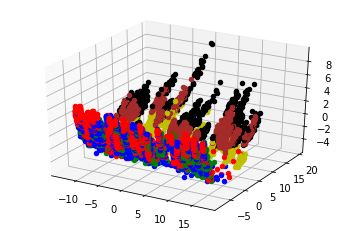

In [50]:
def colors

def plot_2d_projection(data,label,colors):
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    for i in range(len(data)):
        ax.scatter(data[i,0],data[i,1],data[i,2],color=colors[label[i]])
        
plot_2d_projection(tranformed_data_train,label_data,colors)        

In [26]:


map_color = {{'LAYING':'b','SITTING':'r'}
map_color.get('LAYING')

SyntaxError: invalid syntax (<ipython-input-26-8b1f6f83c1e0>, line 4)